<a href="https://colab.research.google.com/github/Nirwa22/Youtube_codes/blob/main/Laptop_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Outline
* Data Cleaning
* Data Analysis
* Feature Engineering
* Modelling
* Website
* Deployment

In [3]:
import numpy as np
import pandas as pd

In [4]:
Data = pd.read_csv('/content/laptop_data.csv')

In [5]:
Data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
Data.duplicated().sum()

0

In [8]:
Data.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

**No missing values or duplicated row**

In [9]:
Data.drop(columns=['Unnamed: 0'],inplace=True)

In [10]:
Data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [11]:
def Ram(x):
  y=""
  w ='0123456789.'
  for i in str(x):
    if i in w:
      y=y+i
  return float(y)

In [12]:
Data['Ram'] = Data['Ram'].apply(Ram)# or use Data['Ram'].str.replace('GB','')

In [13]:
Data['Weight'] = Data['Weight'].apply(Ram)# or use Data['Ram'].str.replace('kg','')

In [14]:
Data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [15]:
type(Data['Weight'][0])

numpy.float64

In [16]:
Data['Ram'] = Data['Ram'].astype('int32')
Data['Weight'] = Data['Weight'].astype('float32')

In [17]:
type(Data['Weight'][0])

numpy.float32

In [18]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


###Some Data analysis

<ipython-input-19-775b1eb0c0b4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data['Price'])


<Axes: xlabel='Price', ylabel='Density'>

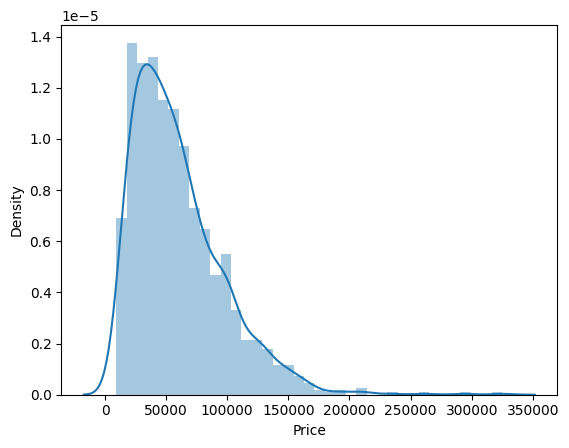

In [19]:
import seaborn as sns
sns.distplot(Data['Price'])

* We are observing the data distribuition
* We can see that data is not evenly distribuited
* laptops having high prices are less and vice versa

<ipython-input-20-d687100f2942>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

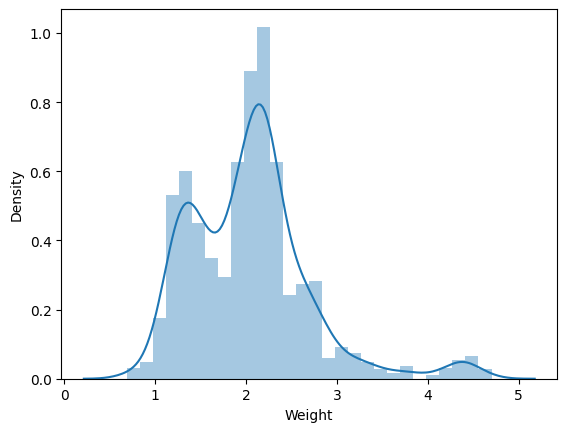

In [20]:
sns.distplot(Data['Weight'])

<Axes: xlabel='Company'>

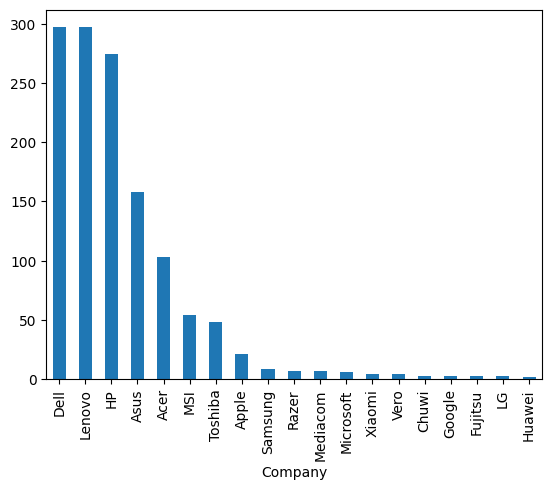

In [21]:
Data['Company'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

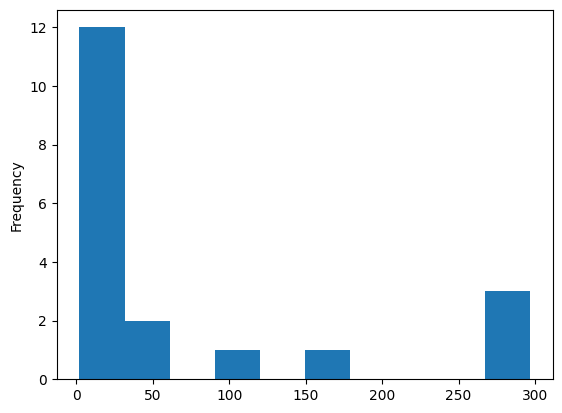

In [22]:
Data['Company'].value_counts().plot(kind='hist')

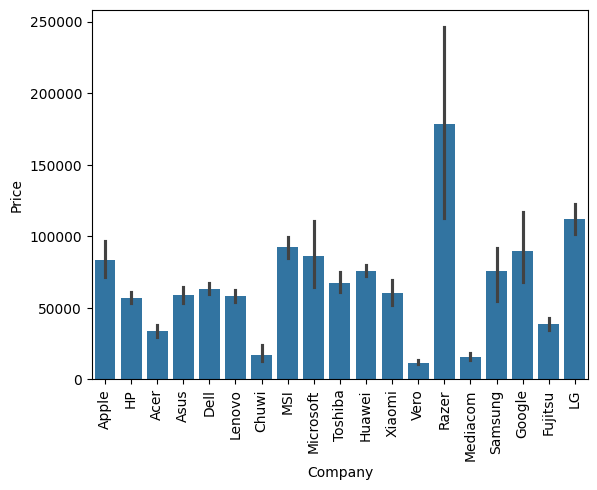

In [23]:
import matplotlib.pyplot as plt
sns.barplot(x=Data['Company'],y=Data['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

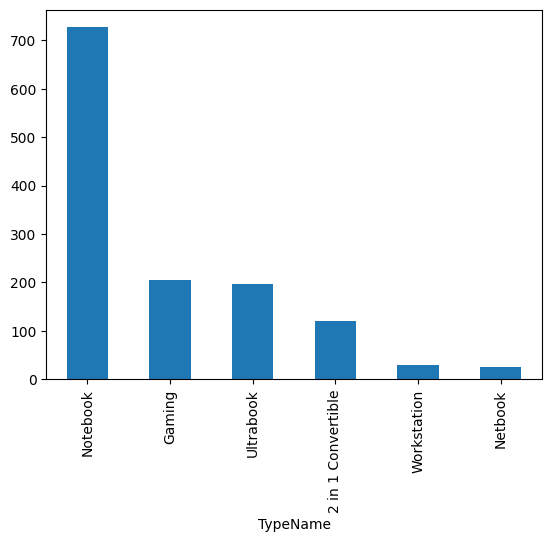

In [24]:
Data['TypeName'].value_counts().plot(kind='bar')

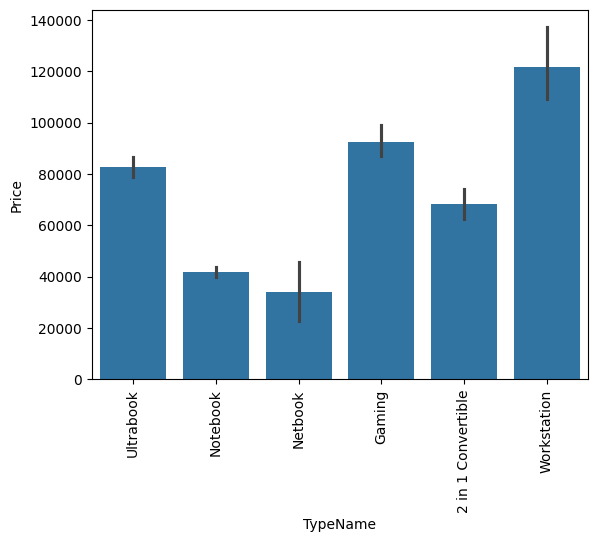

In [25]:
sns.barplot(x=Data['TypeName'],y=Data['Price'])
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-26-7d4ab0638899>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

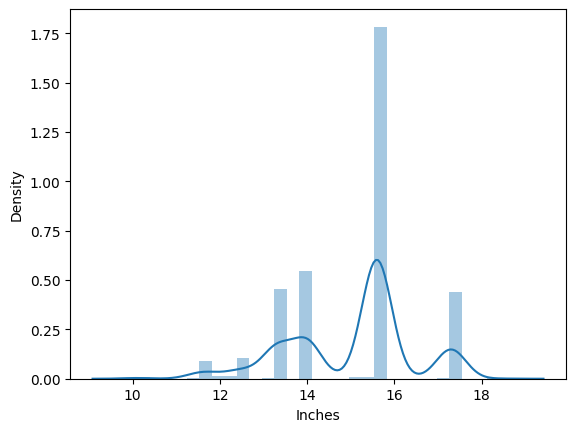

In [26]:
sns.distplot(Data['Inches'])

<Axes: xlabel='Inches'>

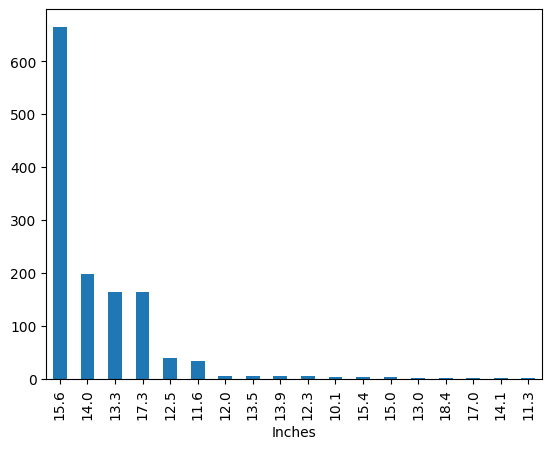

In [27]:
Data['Inches'].value_counts().plot(kind='bar')

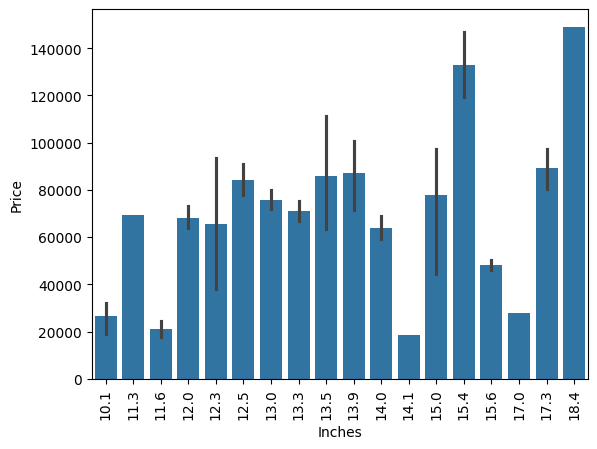

In [28]:
sns.barplot(x=Data['Inches'],y=Data['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

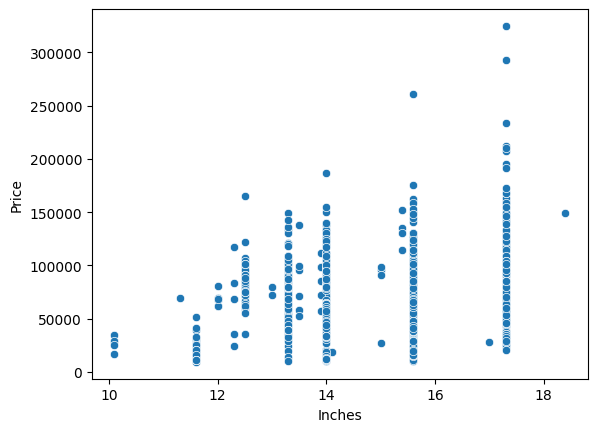

In [29]:
sns.scatterplot(x=Data['Inches'],y=Data['Price'])

In [30]:
Data['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

This column 'SuperResolution' has alot of information in it we need to apply feature engineering on it

In [31]:
Data['Touchscreen'] = Data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

<Axes: xlabel='Touchscreen'>

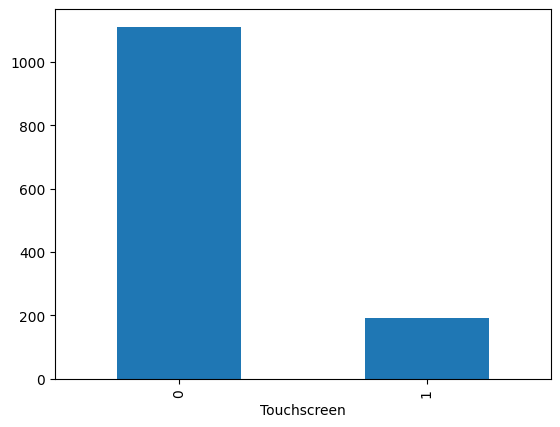

In [32]:
Data['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

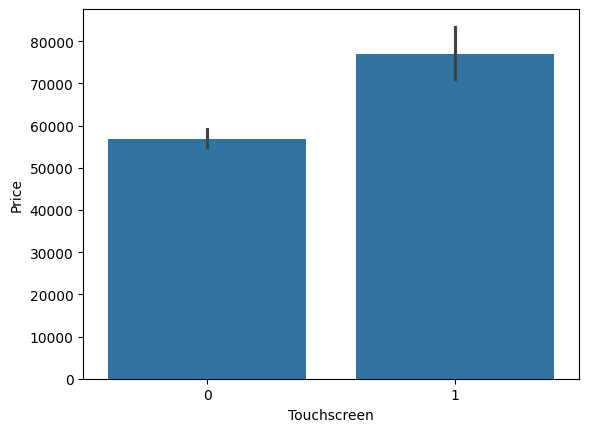

In [33]:
sns.barplot(x=Data['Touchscreen'],y=Data['Price'])

In [34]:
Data['IPSpanel'] = Data['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)

<Axes: xlabel='IPSpanel'>

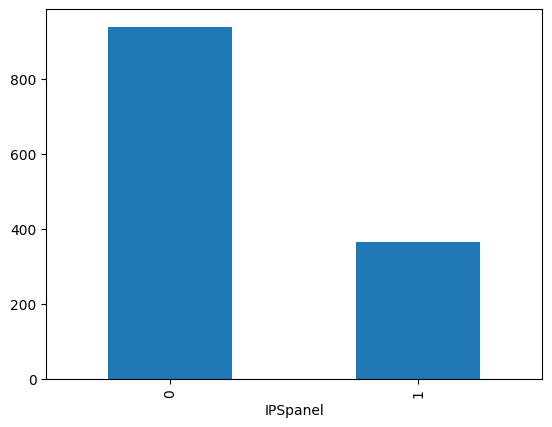

In [35]:
Data['IPSpanel'].value_counts().plot(kind='bar')

<Axes: xlabel='IPSpanel', ylabel='Price'>

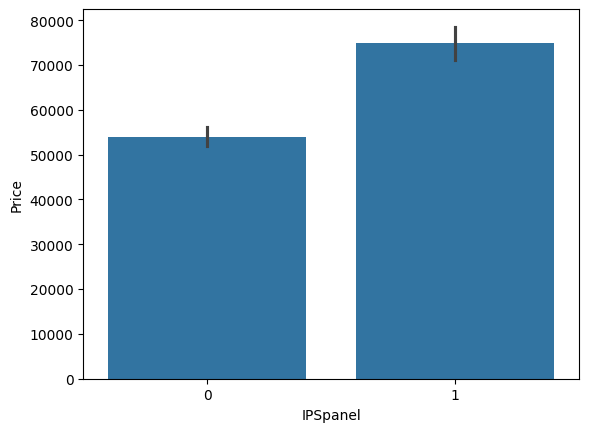

In [36]:
sns.barplot(x=Data['IPSpanel'],y=Data['Price'])

In [37]:
New = Data['ScreenResolution'].str.split('x',n=1,expand=True)

In [38]:
Data['X_dim'] = New[0]
Data['Y_dim']= New[1]

In [39]:
Data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSpanel,X_dim,Y_dim
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [40]:
def x_resolution(x):
  u='0123456789'
  y=''
  for i in x:
    if i in u:
      y=y+i
  return y


In [41]:
Data['X_dim'] = Data['X_dim'].apply(x_resolution)

In [42]:
Data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSpanel,X_dim,Y_dim
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [43]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPSpanel          1303 non-null   int64  
 13  X_dim             1303 non-null   object 
 14  Y_dim             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [44]:
Data['X_dim'] = Data['X_dim'].astype('int')
Data['Y_dim'] = Data['Y_dim'].astype('int')

In [45]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPSpanel          1303 non-null   int64  
 13  X_dim             1303 non-null   int64  
 14  Y_dim             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [46]:
Data['PTI'] = (pow(((Data['X_dim']**2)+(Data['Y_dim']**2)),0.5)/Data['Inches']).astype('float')

In [47]:
Data['PTI']

0       226.983005
1       127.677940
2       141.211998
3       220.534624
4       226.983005
           ...    
1298    157.350512
1299    276.053530
1300    111.935204
1301    100.454670
1302    100.454670
Name: PTI, Length: 1303, dtype: float64

In [48]:
Data.drop(columns=['X_dim','Y_dim'],inplace=True)

In [49]:
Data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSpanel,PTI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [50]:
Data.drop(columns=['Inches'],inplace=True)

In [51]:
Data['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [52]:
Data['Cpu Name'] = Data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [53]:
def fetch_processor(y):
  if y == 'Intel Core i7' or y=='Intel Core i5' or y=='Intel Core i3':
    return y
  else:
    if y.split()[0] == 'Intel':
      return 'Other Intel Processor'
    else:
      return 'AMD Processor'

In [54]:
Data['Cpu brand'] = Data['Cpu Name'].apply(fetch_processor)

In [55]:
Data.sample(5)

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSpanel,PTI,Cpu Name,Cpu brand
1211,Asus,Notebook,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.20,93186.7200,0,0,141.211998,Intel Core i7,Intel Core i7
1158,Lenovo,Notebook,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,1.0TB Hybrid,AMD Radeon R5 M330,Windows 10,2.50,42010.7472,0,0,141.211998,Intel Core i5,Intel Core i5
785,MSI,Gaming,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,1.60,100752.4800,0,1,157.350512,Intel Core i7,Intel Core i7
511,Acer,Notebook,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4,500GB HDD,Nvidia GeForce 940MX,Windows 10,2.20,34045.9200,0,0,141.211998,Intel Core i7,Intel Core i7
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5


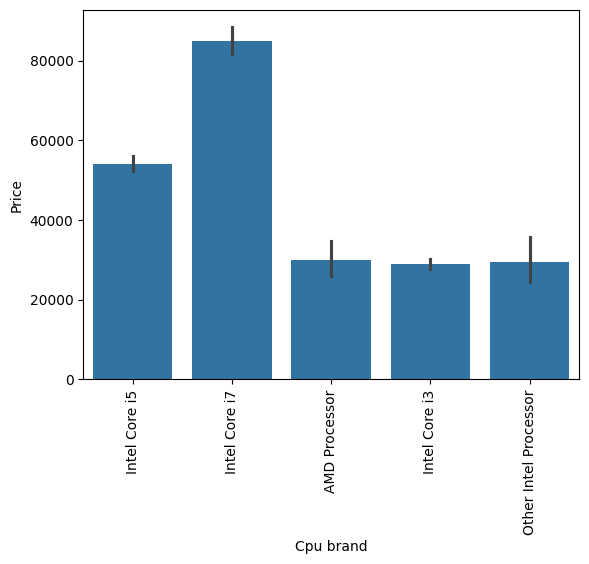

In [56]:
sns.barplot(x=Data['Cpu brand'],y=Data['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Cpu brand'>

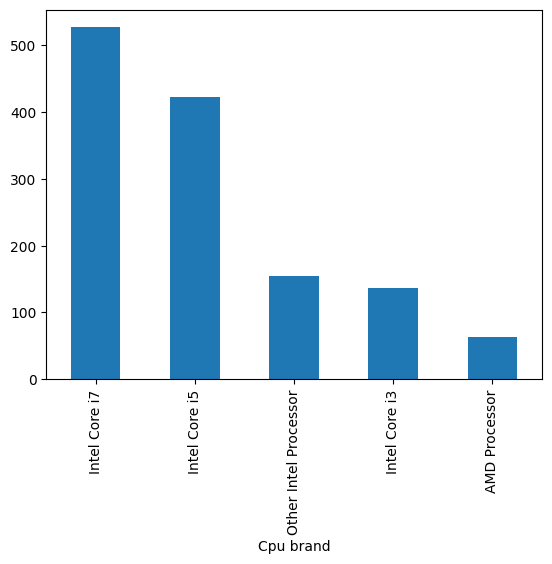

In [57]:
Data['Cpu brand'].value_counts().plot(kind='bar')

In [58]:
Data.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [59]:
Data.head()

,Company,TypeName,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSpanel,PTI,Cpu brand
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

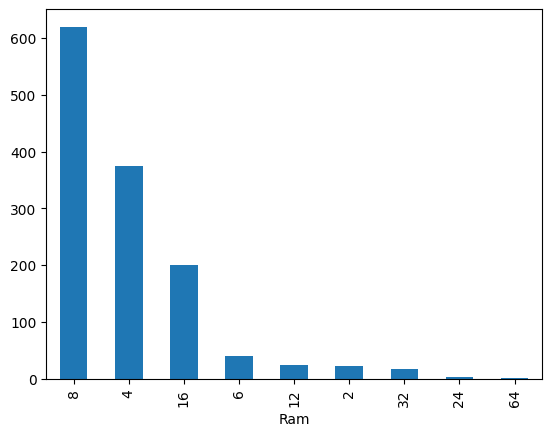

In [60]:
Data['Ram'].value_counts().plot(kind='bar')

<Axes: xlabel='Ram', ylabel='Price'>

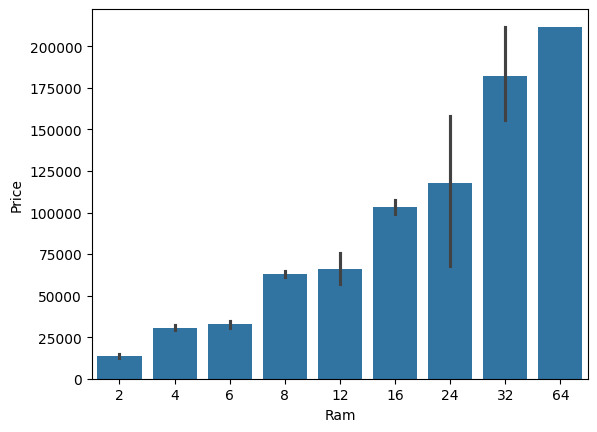

In [61]:
sns.barplot(x=Data['Ram'],y=Data['Price'])

In [62]:
Data['Memory'] = Data['Memory'].astype(str).replace('\.0','',regex=True)
Data['Memory'] = Data['Memory'].str.replace('GB','')
Data['Memory'] = Data['Memory'].str.replace('TB','000')
New = Data['Memory'].str.split('+',n=1,expand = True)

In [63]:
Data.head()

,Company,TypeName,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSpanel,PTI,Cpu brand
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [64]:
Data['first'] = New[0]
Data['first'] = Data['first'].str.strip()

In [65]:
Data.head()

,Company,TypeName,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSpanel,PTI,Cpu brand,first
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD


In [66]:
Data['second'] = New[1]
Data['Layer1HDD'] = Data['first'].apply(lambda x: 1 if 'HDD' in x else 0)
Data['Layer1SSD'] = Data['first'].apply(lambda x: 1 if 'SSD' in x else 0)
Data['Layer1Hybrid'] = Data['first'].apply(lambda x: 1 if 'Hybrid' in x else 0)
Data['Layer1Flash_Storage']=Data['first'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

In [67]:
Data.head()

,Company,TypeName,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSpanel,PTI,Cpu brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,None,0,1,0,0
1,Apple,Ultrabook,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,None,0,0,0,1
2,HP,Notebook,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,None,0,1,0,0
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,None,0,1,0,0
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,None,0,1,0,0


In [68]:
def First(x):
  y=''
  u='1234567890'
  for i in x:
    if i in u:
      y=y+i
  return int(y)

In [69]:
Data['first']= Data['first'].apply(First)

In [70]:
Data['first'][2]

256

In [71]:
Data['second'].fillna('0',inplace=True)

In [72]:
Data['second'].sample(8)

216    0
523    0
551    0
183    0
331    0
222    0
607    0
187    0
Name: second, dtype: object

In [73]:
Data['Layer2HDD'] = Data['second'].apply(lambda x: 1 if 'HDD' in x else 0)
Data['Layer2SSD'] = Data['second'].apply(lambda x: 1 if 'SSD' in x else 0)
Data['Layer2Hybrid'] = Data['second'].apply(lambda x: 1 if 'Hybrid' in x else 0)
Data['Layer2Flash_Storage']=Data['second'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

In [74]:
def Second(x):
  y=""
  u='0123456789'
  if x==0:
    return x
  else:
    for i in x:
      if i in u:
        y=y+i
    return int(y)

In [75]:
Data['second'] = Data['second'].apply(Second)

In [76]:
Data.head()

,Company,TypeName,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,...,128,0,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,...,128,0,0,0,0,1,0,0,0,0
2,HP,Notebook,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,...,256,0,0,1,0,0,0,0,0,0
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,...,512,0,0,1,0,0,0,0,0,0
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,...,256,0,0,1,0,0,0,0,0,0


In [77]:
Data['first'] = Data['first'].astype(int)
Data['second'] = Data['second'].astype(int)

In [78]:
Data['HDD'] = (Data['first']*Data['Layer1HDD']+Data['second']*Data['Layer2HDD'])
Data['SSD'] = (Data['first']*Data['Layer1SSD']+Data['second']*Data['Layer2SSD'])
Data['Hybrid'] = (Data['first']*Data['Layer1Hybrid']+Data['second']*Data['Layer2Hybrid'])
Data['Flash_Storage'] = (Data['first']*Data['Layer1Flash_Storage']+Data['second']*Data['Layer2Flash_Storage'])

In [79]:
Data[['first','second','Layer1HDD','Layer2HDD','HDD']].sample(8)

,first,second,Layer1HDD,Layer2HDD,HDD
786,128,1000,0,1,1000
1272,64,0,0,0,0
1068,256,1000,0,1,1000
30,64,0,0,0,0
1198,1000,0,1,0,1000
109,256,0,0,0,0
68,1000,0,1,0,1000
1054,1000,0,0,0,0


In [80]:
Data.drop(columns=['first','second','Layer1HDD','Layer2HDD','Layer1Hybrid','Layer2Hybrid','Layer1Flash_Storage','Layer2Flash_Storage','Layer2SSD','Layer1SSD'],inplace=True)

In [81]:
Data.head()

,Company,TypeName,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSpanel,PTI,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [82]:
Data.drop(columns=['Memory'],inplace=True)

In [83]:
Data.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [84]:
Data['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [85]:
#Only extracting brand name
Data['Gpu'] = Data['Gpu'].apply(lambda x:x.split()[0])

In [86]:
Data['Gpu'].sample(5)

342     Nvidia
1203     Intel
1193     Intel
354     Nvidia
166      Intel
Name: Gpu, dtype: object

In [87]:
Data['Gpu'].value_counts()

Gpu
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [88]:
Data = Data[Data['Gpu'] != 'ARM']

In [89]:
Data['Gpu'].value_counts()

Gpu
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

<Axes: xlabel='Gpu', ylabel='Price'>

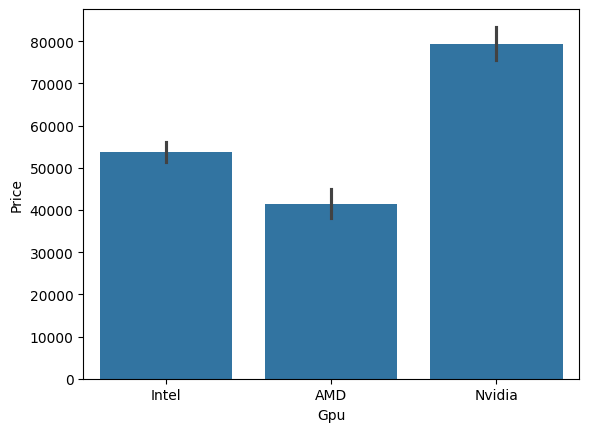

In [90]:
sns.barplot(x=Data['Gpu'],y=Data['Price'])

In [91]:
Data.head()

,Company,TypeName,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPSpanel,PTI,Cpu brand,HDD,SSD
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,Intel,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,1440x900,8,Intel,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,Full HD 1920x1080,8,Intel,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,AMD,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,Intel,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [92]:
Data['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

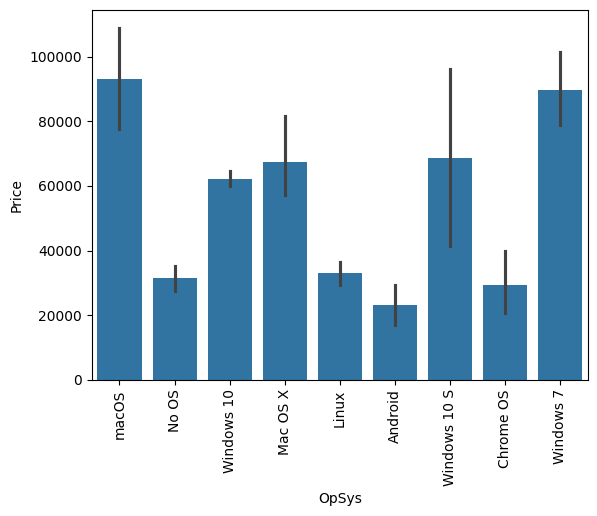

In [93]:
sns.barplot(x=Data['OpSys'],y=Data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [94]:
def OP(x):
  if x=='Windows 10' or x=='Windows 7' or x=='Windows 10 S':
    return 'Windows'
  elif x=='macOS' or x=='Mac OS X':
    return 'Mac'
  else:
    return 'Others/No OS/Linux'

In [95]:
Data['OpSys'] = Data['OpSys'].apply(OP)

In [96]:
Data['OpSys'].value_counts()

OpSys
Windows               1125
Others/No OS/Linux     156
Mac                     21
Name: count, dtype: int64

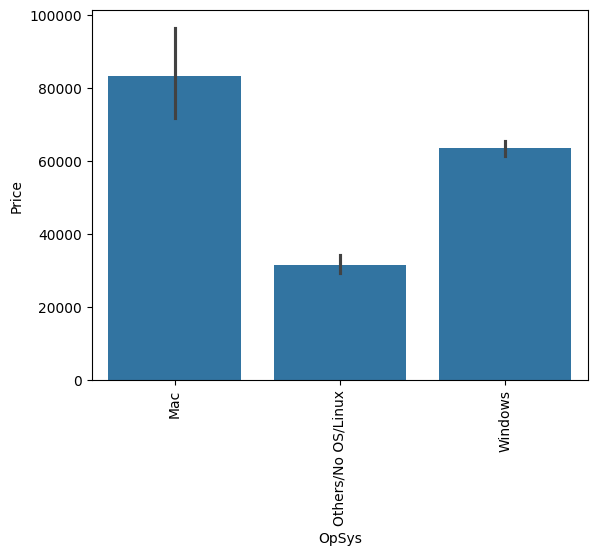

In [97]:
sns.barplot(x=Data['OpSys'],y = Data['Price'])
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-98-d687100f2942>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

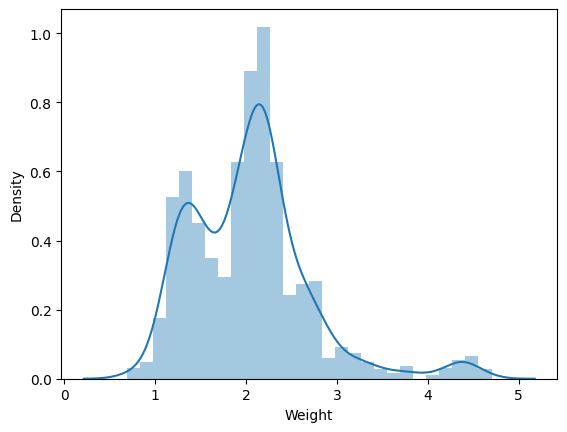

In [98]:
sns.distplot(Data['Weight'])

In [99]:
numerical_data = Data.select_dtypes(include=[float, int])
numerical_data.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
IPSpanel       0.253320
PTI            0.351919
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<Axes: xlabel='Weight', ylabel='Price'>

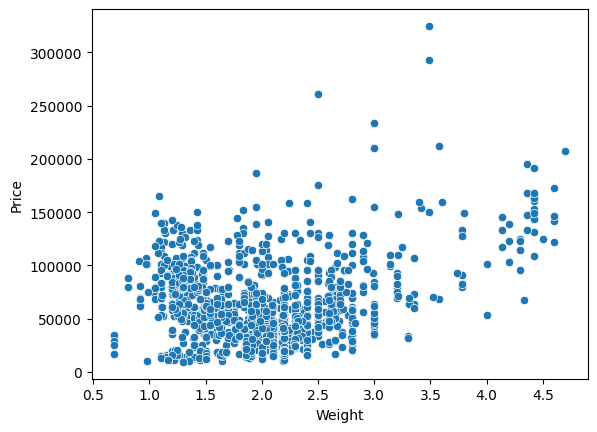

In [100]:
sns.scatterplot(x=Data['Weight'],y=Data['Price'])

In [101]:
Data.drop(columns=['ScreenResolution'],inplace=True)

In [102]:
Data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPSpanel,PTI,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel,Others/No OS/Linux,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [103]:
numerical_data.corr()

,Ram,Weight,Price,Touchscreen,IPSpanel,PTI,HDD,SSD
Ram,1.000000,0.383362,0.742905,0.118875,0.207949,0.269231,0.095808,0.603379
Weight,0.383362,1.000000,0.209867,-0.293004,0.018643,0.004659,0.514147,-0.063818
Price,0.742905,0.209867,1.000000,0.192917,0.253320,0.351919,-0.096891,0.670660
Touchscreen,0.118875,-0.293004,0.192917,1.000000,0.148026,0.252852,-0.208766,0.257577
IPSpanel,0.207949,0.018643,0.253320,0.148026,1.000000,0.146823,-0.093588,0.225311
PTI,0.269231,0.004659,0.351919,0.252852,0.146823,1.000000,-0.040482,0.328618
HDD,0.095808,0.514147,-0.096891,-0.208766,-0.093588,-0.040482,1.000000,-0.400750
SSD,0.603379,-0.063818,0.670660,0.257577,0.225311,0.328618,-0.400750,1.000000


<Axes: >

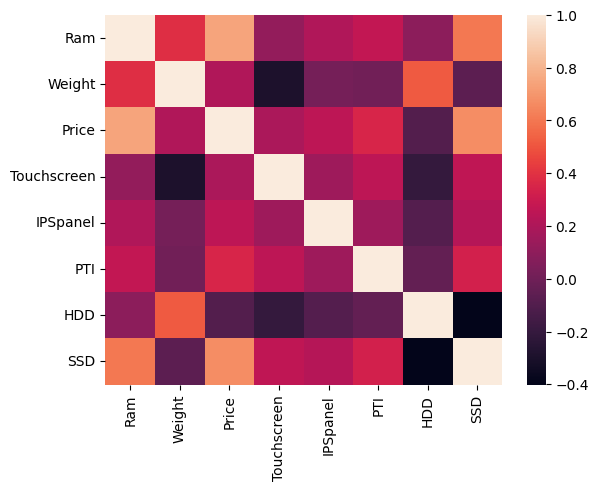

In [104]:
sns.heatmap(numerical_data.corr())

<ipython-input-105-f27665bbf058>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data['Price'])


<Axes: xlabel='Price', ylabel='Density'>

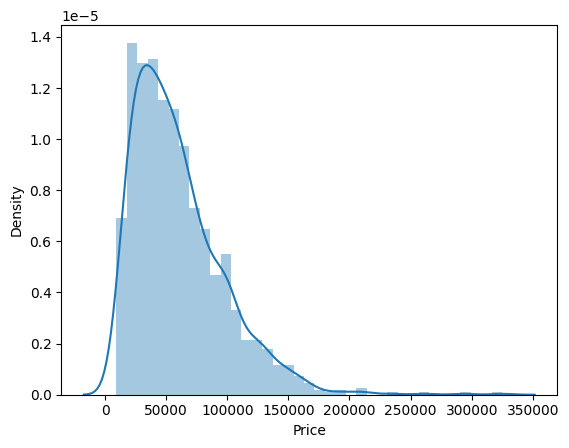

In [105]:
sns.distplot(Data['Price'])

<ipython-input-106-d3dfa93bd7b8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(Data['Price']))


<Axes: xlabel='Price', ylabel='Density'>

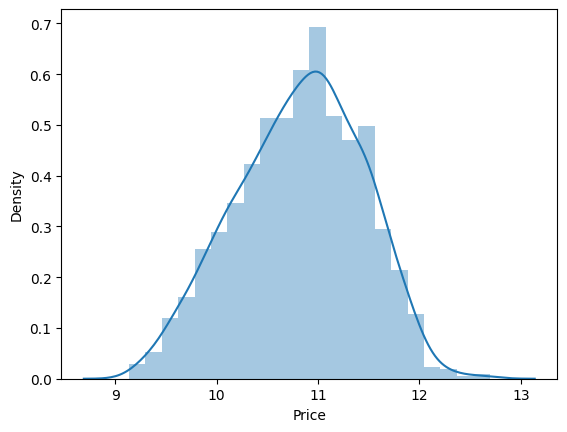

In [106]:
sns.distplot(np.log(Data['Price']))

In [107]:
#Dividing data into input(x) and output(y)
X = Data.drop(columns=['Price'])
Y = np.log(Data['Price'])

In [108]:
X.head(),X.shape

(  Company   TypeName  Ram    Gpu               OpSys  Weight  Touchscreen  \
 0   Apple  Ultrabook    8  Intel                 Mac    1.37            0   
 1   Apple  Ultrabook    8  Intel                 Mac    1.34            0   
 2      HP   Notebook    8  Intel  Others/No OS/Linux    1.86            0   
 3   Apple  Ultrabook   16    AMD                 Mac    1.83            0   
 4   Apple  Ultrabook    8  Intel                 Mac    1.37            0   
 
    IPSpanel         PTI      Cpu brand  HDD  SSD  
 0         1  226.983005  Intel Core i5    0  128  
 1         0  127.677940  Intel Core i5    0    0  
 2         0  141.211998  Intel Core i5    0  256  
 3         1  220.534624  Intel Core i7    0  512  
 4         1  226.983005  Intel Core i5    0  256  ,
 (1302, 12))

In [109]:
Y.head()

0    11.175755
1    10.776777
2    10.329931
3    11.814476
4    11.473101
Name: Price, dtype: float64

In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [111]:
#Treating non-numerical columns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

### Linear Regression Model

In [113]:
Step_1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])],remainder='passthrough')
Step_2 = LinearRegression()
pipeline = Pipeline([('Step_1',Step_1),('Step_2',Step_2)])
pipeline.fit(X_train,Y_train)
predictions = pipeline.predict(X_test)
print(f"R2 score : {r2_score(predictions,Y_test)}")
print(f"MAE : {mean_absolute_error(predictions,Y_test)}")
print(f"MSE : {mean_squared_error(predictions,Y_test)}")

R2 score : 0.7199012867594196
MAE : 0.2218112719557343
MSE : 0.08570593195848583


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**Lets try other models as well**

###Decision tree and Random Forest

In [114]:
from sklearn.ensemble import RandomForestRegressor
Step_1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])],remainder='passthrough')
Step_2 = RandomForestRegressor(n_estimators=130)
pipeline = Pipeline([('Step_1',Step_1),('Step_2',Step_2)])
pipeline.fit(X_train,Y_train)
predictions = pipeline.predict(X_test)
print(f"R2 score : {r2_score(predictions,Y_test)}")
print(f"MAE : {mean_absolute_error(predictions,Y_test)}")
print(f"MSE : {mean_squared_error(predictions,Y_test)}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score : 0.8458341977842839
MAE : 0.1648315589419609
MSE : 0.04762163667172826


In [115]:
from sklearn.tree import DecisionTreeRegressor

In [116]:
Step_1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])],remainder='passthrough')
Step_2 = DecisionTreeRegressor()
pipeline = Pipeline([('Step_1',Step_1),('Step_2',Step_2)])
pipeline.fit(X_train,Y_train)
predictions = pipeline.predict(X_test)
print(f"R2 score : {r2_score(predictions,Y_test)}")
print(f"MAE : {mean_absolute_error(predictions,Y_test)}")
print(f"MSE : {mean_squared_error(predictions,Y_test)}")

R2 score : 0.7949767713837248
MAE : 0.20213327731744618
MSE : 0.07259831262887724


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**Random Forest performed better than Decision tree**

In [117]:
from sklearn.tree import ExtraTreeRegressor
Step_1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])],remainder='passthrough')
Step_2 = ExtraTreeRegressor()
pipeline = Pipeline([('Step_1',Step_1),('Step_2',Step_2)])
pipeline.fit(X_train,Y_train)
predictions = pipeline.predict(X_test)
print(f"R2 score : {r2_score(predictions,Y_test)}")
print(f"MAE : {mean_absolute_error(predictions,Y_test)}")
print(f"MSE : {mean_squared_error(predictions,Y_test)}")

R2 score : 0.75549144281254
MAE : 0.2092827327259864
MSE : 0.08070187601373198


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


###Ridge and Lasso

In [118]:
from sklearn.linear_model import Ridge,Lasso
Step_1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])],remainder='passthrough')
Step_2 = Ridge()
pipeline = Pipeline([('Step_1',Step_1),('Step_2',Step_2)])
pipeline.fit(X_train,Y_train)
predictions = pipeline.predict(X_test)
print(f"R2 score : {r2_score(predictions,Y_test)}")
print(f"MAE : {mean_absolute_error(predictions,Y_test)}")
print(f"MSE : {mean_squared_error(predictions,Y_test)}")

R2 score : 0.71820992553092
MAE : 0.22100524507705763
MSE : 0.08404649104403693


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [119]:
Step_1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])],remainder='passthrough')
Step_2 = Lasso(alpha=10)
pipeline = Pipeline([('Step_1',Step_1),('Step_2',Step_2)])
pipeline.fit(X_train,Y_train)
predictions = pipeline.predict(X_test)
print(f"R2 score : {r2_score(predictions,Y_test)}")
print(f"MAE : {mean_absolute_error(predictions,Y_test)}")
print(f"MSE : {mean_squared_error(predictions,Y_test)}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score : -0.5384383621382887
MAE : 0.3696261347702698
MSE : 0.21843956377717572


###Agaboost and XgBoost

In [120]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor,HistGradientBoostingRegressor

In [121]:
Step_1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])],remainder='passthrough')
Step_2 = AdaBoostRegressor(n_estimators=100)
pipeline = Pipeline([('Step_1',Step_1),('Step_2',Step_2)])
pipeline.fit(X_train,Y_train)
predictions = pipeline.predict(X_test)
print(f"R2 score : {r2_score(predictions,Y_test)}")
print(f"MAE : {mean_absolute_error(predictions,Y_test)}")
print(f"MSE : {mean_squared_error(predictions,Y_test)}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score : 0.6465216804845754
MAE : 0.24296957891352522
MSE : 0.08695560401219464


In [122]:
Step_1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])],remainder='passthrough')
Step_2 = GradientBoostingRegressor(n_estimators=4800)
pipeline = Pipeline([('Step_1',Step_1),('Step_2',Step_2)])
pipeline.fit(X_train,Y_train)
predictions = pipeline.predict(X_test)
print(f"R2 score : {r2_score(predictions,Y_test)}")
print(f"MAE : {mean_absolute_error(predictions,Y_test)}")
print(f"MSE : {mean_squared_error(predictions,Y_test)}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score : 0.859303327145007
MAE : 0.16815922768159539
MSE : 0.051959737454964086


**GradientBoostingRegressor is robust to overfitting so if we increase the n_estimators it will perform better**

In [123]:
Step_1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])],remainder='passthrough')
Step_2 = BaggingRegressor(n_estimators=700)
pipeline = Pipeline([('Step_1',Step_1),('Step_2',Step_2)])
pipeline.fit(X_train,Y_train)
predictions = pipeline.predict(X_test)
print(f"R2 score : {r2_score(predictions,Y_test)}")
print(f"MAE : {mean_absolute_error(predictions,Y_test)}")
print(f"MSE : {mean_squared_error(predictions,Y_test)}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score : 0.8440670845572977
MAE : 0.16602921970085036
MSE : 0.0481153685239769


In [124]:
Step_1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])],remainder='passthrough')
Step_2 = HistGradientBoostingRegressor(max_iter=1000)
pipeline = Pipeline([('Step_1',Step_1),('Step_2',Step_2)])
pipeline.fit(X_train,Y_train)
predictions = pipeline.predict(X_test)
print(f"R2 score : {r2_score(predictions,Y_test)}")
print(f"MAE : {mean_absolute_error(predictions,Y_test)}")
print(f"MSE : {mean_squared_error(predictions,Y_test)}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score : 0.8542088915453697
MAE : 0.17062007189434322
MSE : 0.05089780888533159


In [125]:
from xgboost import XGBRegressor
Step_1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])],remainder='passthrough')
Step_2 = XGBRegressor(n_estimator=10)
pipeline = Pipeline([('Step_1',Step_1),('Step_2',Step_2)])
pipeline.fit(X_train,Y_train)
predictions = pipeline.predict(X_test)
print(f"R2 score : {r2_score(predictions,Y_test)}")
print(f"MAE : {mean_absolute_error(predictions,Y_test)}")
print(f"MSE : {mean_squared_error(predictions,Y_test)}")

R2 score : 0.8598590663758392
MAE : 0.16576942656654575
MSE : 0.048715988527142484


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:11:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


In [126]:
X.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Touchscreen,IPSpanel,PTI,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel,Mac,1.37,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel,Mac,1.34,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel,Others/No OS/Linux,1.86,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD,Mac,1.83,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel,Mac,1.37,0,1,226.983005,Intel Core i5,0,256


###Voting Regressor and Stacking Regressor

In [143]:
from sklearn.ensemble import VotingRegressor
Step_1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])],remainder='passthrough')
RF = RandomForestRegressor(n_estimators=130)
GBR= GradientBoostingRegressor(n_estimators=4800)
BR = BaggingRegressor(n_estimators=700)
HGBR = HistGradientBoostingRegressor(max_iter=1000)
XGB = XGBRegressor(n_estimator=10)
DT = DecisionTreeRegressor()
Step_2 = VotingRegressor(estimators=[('rf',RF),('gbr',GBR),('br',BR),('hgbr',HGBR),('xgb',XGB),('dt',DT)],weights=[5,5,1,1,5,1])
pipeline = Pipeline([('Step_1',Step_1),('Step_2',Step_2)])
pipeline.fit(X_train,Y_train)
predictions = pipeline.predict(X_test)
print(f"R2 score : {r2_score(predictions,Y_test)}")
print(f"MAE : {mean_absolute_error(predictions,Y_test)}")
print(f"MSE : {mean_squared_error(predictions,Y_test)}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:35:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


R2 score : 0.87025005559328
MAE : 0.1568164936804895
MSE : 0.043363215401526156


In [128]:
from sklearn.ensemble import StackingRegressor
Step_1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])],remainder='passthrough')
RF = RandomForestRegressor(n_estimators=130)
GBR= GradientBoostingRegressor(n_estimators=4800)
BR = BaggingRegressor(n_estimators=700)
HGBR = HistGradientBoostingRegressor(max_iter=1000)
XGB = XGBRegressor(n_estimator=10)
Step_2 = StackingRegressor(estimators=[('rf',RF),('gbr',GBR),('br',BR),('hgbr',HGBR),('xgb',XGB)],final_estimator=XGBRegressor())
pipeline = Pipeline([('Step_1',Step_1),('Step_2',Step_2)])
pipeline.fit(X_train,Y_train)
predictions = pipeline.predict(X_test)
print(f"R2 score : {r2_score(predictions,Y_test)}")
print(f"MAE : {mean_absolute_error(predictions,Y_test)}")
print(f"MSE : {mean_squared_error(predictions,Y_test)}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:12:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:13:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:13:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


R2 score : 0.7914498072781591
MAE : 0.19603081306439454
MSE : 0.06651134105481789


**We are done with the model**


###Website
* Exporting the Model

In [144]:
import pickle
pickle.dump(Data,open('Data.pkl','wb'))
pickle.dump(pipeline,open('pipeline.pkl','wb'))

In [145]:
!pip install streamlit -q

In [146]:
!wget -q -O - ipv4.icanhazip.com

34.125.145.253


In [153]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.145.253:8501

your url is: https://shaggy-zebras-peel.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
  Stopping...
^C
